# Pruning of leaf nodes

Leaf nodes are nodes that connect into the Graph with only 1 edge.  Unless the leaf is a Drug or a Disease, it will not be a part of any paths from Drug to Disease as the single edge that connects it to the path cannot be traversed twice.

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

from data_tools.plotting import count_plot_h
from data_tools import combine_nodes_and_edges
from data_tools.df_processing import combine_group_cols_on_char, expand_col_on_char
from data_tools.graphs import map_edge_types_from_file, add_abbrevs, get_core_network

/opt/mmayers/software/anaconda3/envs/ml/lib/python3.6/site-packages/data_tools/df_processing.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
prev_dir = Path('../2_pipeline/12b_Preprocessing-Semmantic_Hierarchy_Mapping/out').resolve()
data_dir = Path('../0_data/manual/').resolve()

In [3]:
nodes = pd.read_csv(prev_dir.joinpath('nodes.csv'), dtype=str)
edges = pd.read_csv(prev_dir.joinpath('edges.csv'), dtype=str)

## Prune Leaf Nodes

In [4]:
print('Before Pruning:')
print('{:,}'.format(len(nodes)))
print('{:,}'.format(len(edges)))

node_ids = set(nodes['id'])

Before Pruning:
384,723
9,786,425


In [5]:
%%time
# Allow compounds or diseases to be a leaf
nodes_prune, edges_prune = get_core_network(nodes, edges, ['Disease', 'Compound', 'Drug'])

CPU times: user 48.7 s, sys: 13.3 s, total: 1min 1s
Wall time: 1min 1s


In [6]:
print('\nAfter Pruning:')
print('{:,}'.format(len(nodes_prune)))
print('{:,}'.format(len(edges_prune)))


After Pruning:
250,035
9,652,116


In [7]:
missing_nodes = node_ids - set(nodes_prune['id'])

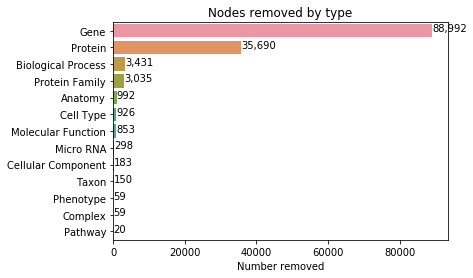

In [8]:
count_plot_h(nodes.query('id in @missing_nodes')['label'])
plt.title('Nodes removed by type')
plt.xlabel('Number removed');

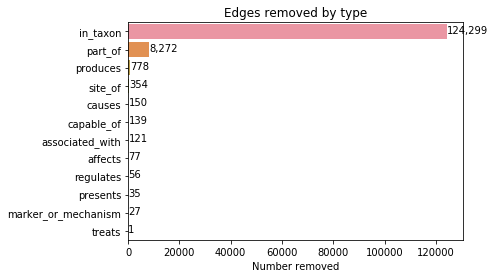

In [9]:
count_plot_h(edges.query('start_id in @missing_nodes or end_id in @missing_nodes')['type'])
plt.title('Edges removed by type')
plt.xlabel('Number removed');

## Save results

In [10]:
this_name = '12c_Preprocessing-Pruning'

out_dir = Path('../2_pipeline/').joinpath(this_name).joinpath('out').resolve()

out_dir.mkdir(parents=True, exist_ok=True)

nodes_prune.to_csv(out_dir.joinpath('nodes.csv'), index=False)
edges_prune.to_csv(out_dir.joinpath('edges.csv'), index=False)